# Part I - Covid-19 Impact (2020-2021) Data Exploration 
## by Elliot Manuel Sithole

01-09-2022

## Introdoction
The complete COVID-19 dataset was a collection of the COVID-19 data from January 2020 to Dec 2021 maintained by [Our World](https://ourworldindata.org/coronavirus) in Data. This was updated  daily throughout the duration of the COVID-19 pandemic (more information [visit](https://docs.owid.io/projects/covid/en/latest/data-pipeline.html#overview)). And, for explanations about all the features in the data set [visit](https://github.com/owid/covid-19-data/blob/master/public/data/README.md). 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

>This section of the report, will load in the data, describe and check for cleanliness, and if any need trim and clean the dataset for exploratory analysis.

In [2]:
# load data and inspect
df= pd.read_csv('CovidDeaths.csv')
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  24/02/2020          1.0        1.0   
1      AFG      Asia  Afghanistan  25/02/2020          1.0        0.0   
2      AFG      Asia  Afghanistan  26/02/2020          1.0        0.0   
3      AFG      Asia  Afghanistan  27/02/2020          1.0        0.0   
4      AFG      Asia  Afghanistan  28/02/2020          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   
1        1803.987              NaN                597.029   
2        1803.987              NaN                597.029   
3        1803.987              NaN                597.029   
4        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         0.5            64.83                    0.511  
1                         0.5            64.83                    0.511  
2                         0.5            64.83                    0.511  
3                         0.5            64.83                    0.511  
4                         0.5            64.83                    0.511  

[5 rows x 59 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85171 entries, 0 to 85170
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               85171 non-null  object 
 1   continent                              81060 non-null  object 
 2   location                               85171 non-null  object 
 3   date                                   85171 non-null  object 
 4   total_cases                            83072 non-null  float64
 5   new_cases                              83070 non-null  float64
 6   new_cases_smoothed                     82069 non-null  float64
 7   total_deaths                           73408 non-null  float64
 8   new_deaths                             73566 non-null  float64
 9   new_deaths_smoothed                    82069 non-null  float64
 10  total_cases_per_million                82623 non-null  float64
 11  ne

In [4]:
df.shape

(85171, 59)

In [5]:
# Make copies of original pieces of data
df_covid= df.copy()

In [6]:
#change date dtype to datetime
df_covid.date = pd.to_datetime(df_covid.date)

In [7]:
df_covid.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 85171 entries, 0 to 85170
Series name: date
Non-Null Count  Dtype         
--------------  -----         
85171 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 665.5 KB


In [8]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85171 entries, 0 to 85170
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               85171 non-null  object        
 1   continent                              81060 non-null  object        
 2   location                               85171 non-null  object        
 3   date                                   85171 non-null  datetime64[ns]
 4   total_cases                            83072 non-null  float64       
 5   new_cases                              83070 non-null  float64       
 6   new_cases_smoothed                     82069 non-null  float64       
 7   total_deaths                           73408 non-null  float64       
 8   new_deaths                             73566 non-null  float64       
 9   new_deaths_smoothed                    82069 non-null  float6

In [9]:
# inspect and clean for duplicates
df_covid.duplicated().value_counts()

False    85171
dtype: int64

In [10]:
#check for null values
df_covid.isnull().sum()


iso_code                                     0
continent                                 4111
location                                     0
date                                         0
total_cases                               2099
new_cases                                 2101
new_cases_smoothed                        3102
total_deaths                             11763
new_deaths                               11605
new_deaths_smoothed                       3102
total_cases_per_million                   2548
new_cases_per_million                     2550
new_cases_smoothed_per_million            3546
total_deaths_per_million                 12199
new_deaths_per_million                   12041
new_deaths_smoothed_per_million           3546
reproduction_rate                        16229
icu_patients                             76487
icu_patients_per_million                 76487
hosp_patients                            74357
hosp_patients_per_million                74357
weekly_icu_ad

## Storing Data
>Save gathered, assessed, and cleaned master dataset to a CSV file named covid_deaths

In [11]:
df_covid.to_csv('covid_deaths.csv',index=False)

## Analyzing and Visualizing Data

In [12]:
df = pd.read_csv('covid_deaths.csv')
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   
1        1803.987              NaN                597.029   
2        1803.987              NaN                597.029   
3        1803.987              NaN                597.029   
4        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         0.5            64.83                    0.511  
1                         0.5            64.83                    0.511  
2                         0.5            64.83                    0.511  
3                         0.5            64.83                    0.511  
4                         0.5            64.83                    0.511  

[5 rows x 59 columns]

#####  Global Top  Continents by number of Covid new cases

In [54]:
#use the groupby(), then apply sort_values with ascending=False
most_infected= df.query('continent == continent').groupby(['continent']).sum()[['new_cases']]
ranked_infected=most_infected.apply(lambda x: x.sort_values(ascending= True))
ranked_infected.head(5)          


new_cases
continent                
Oceania           43570.0
Africa          4557699.0
South America  24878216.0
North America  37529487.0
Asia           38702527.0

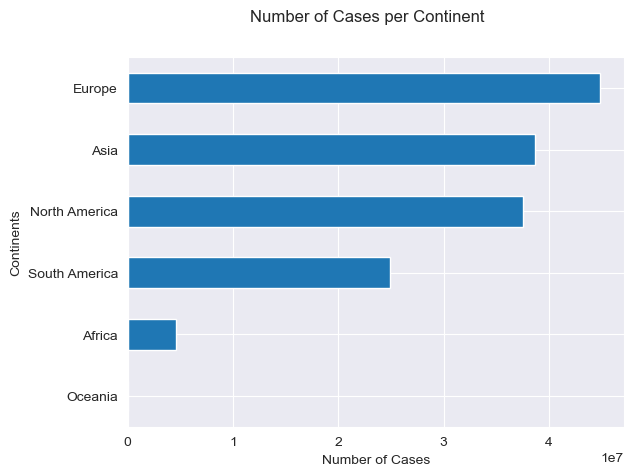

In [55]:
# visualise the new_cases distribution by continent
ranked_infected.new_cases.plot(kind='barh',stacked=True)
plt.suptitle('Number of Cases per Continent') 
plt.xlabel('Number of Cases')
plt.ylabel('Continents'); 

> Europe had the leading total number of new Covid-19 cases of over 40 million from the period, with Oceania and Africa recording the least.

#####  Global Top  Continents by number of Covid new deaths

In [15]:
#use the groupby(), then apply sort_values with ascending=True
most_deaths= df.query('continent == continent').groupby(['continent']).sum()[['new_deaths']]
ranked_deaths=most_deaths.apply(lambda x: x.sort_values(ascending=True))
ranked_deaths.head(5)  

new_deaths
continent                
Oceania            1046.0
Africa           121784.0
Asia             520269.0
South America    672415.0
North America    847942.0

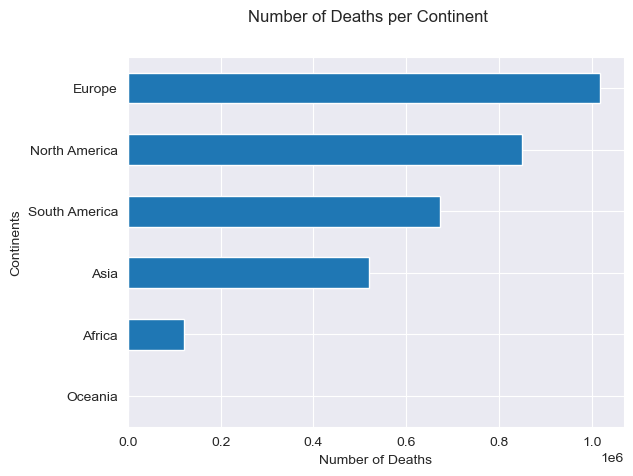

In [56]:
# visualise the new_deaths distribution by continent
ranked_deaths.new_deaths.plot(kind='barh',stacked=True)
plt.suptitle('Number of Deaths per Continent') 
plt.xlabel('Number of Deaths')
plt.ylabel('Continents'); 

> As reviewed, the number of deaths per continent was significantlty higher in Europe compared to any other region

##### Case Fatality Rate: Total Deaths vs Total Cases
>Shows likelihood of death per covid cases by percentage

In [17]:
#add new column for death per case percentage
df1 = df.assign(case_fatality = df['total_deaths'] / df['total_cases']*100)
df1.sample(5)

iso_code      continent  location        date  total_cases  new_cases  \
77321      TGO         Africa      Togo  2020-06-14        530.0        0.0   
73611      SUR  South America  Suriname  2020-01-11       5210.0        7.0   
58462      PAK           Asia  Pakistan  2020-05-23      54601.0     2164.0   
58094      OMN           Asia      Oman  2020-07-25      74858.0     1067.0   
2057       AND         Europe   Andorra  2021-01-16       9038.0       92.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
77321               5.000          13.0         0.0                0.000  ...   
73611               5.714         111.0         0.0                0.286  ...   
58462            2064.286        1133.0        32.0               37.143  ...   
58094            1336.286         371.0        12.0                9.000  ...   
2057               64.571          91.0         3.0                0.857  ...   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
77321             49.2                280.033                 6.15   
73611              NaN                258.314                12.54   
58462              4.0                423.031                 8.35   
58094              NaN                266.342                12.61   
2057               NaN                109.135                 7.97   

       female_smokers  male_smokers  handwashing_facilities  \
77321             0.9          14.2                  10.475   
73611             7.4          42.9                  67.779   
58462             2.8          36.7                  59.607   
58094             0.5          15.6                  97.400   
2057             29.0          37.8                     NaN   

       hospital_beds_per_thousand  life_expectancy  human_development_index  \
77321                         0.7            61.04                    0.515   
73611                         3.1            71.68                    0.738   
58462                         0.6            67.27                    0.557   
58094                         1.6            77.86                    0.813   
2057                          NaN            83.73                    0.868   

       case_fatality  
77321       2.452830  
73611       2.130518  
58462       2.075054  
58094       0.495605  
2057        1.006860  

[5 rows x 60 columns]

In [18]:
# group and sort 
case_fatality_rate= df1.query('continent == continent').groupby(['continent']).mean()[['case_fatality']]
ranked=case_fatality_rate.apply(lambda x: x.sort_values(ascending=True))
ranked.head(5)  

case_fatality
continent                   
Oceania             2.362314
Asia                2.376027
Africa              2.701905
Europe              3.246025
South America       3.369159

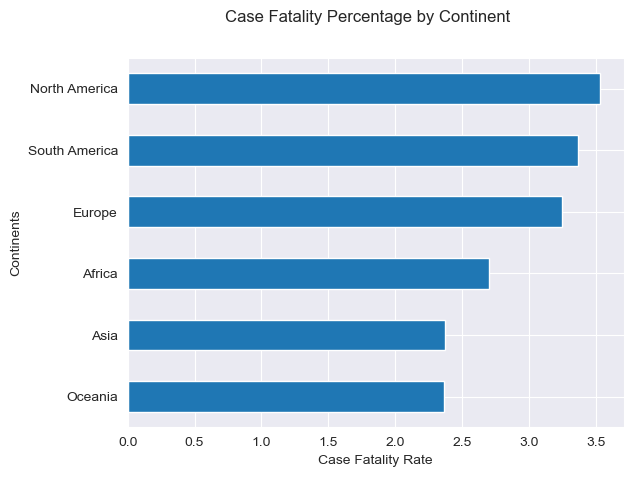

In [57]:
# visualise case fatality distribution by continent
ranked.case_fatality.plot(kind='barh',stacked=True)
plt.suptitle('Case Fatality Percentage by Continent') 
plt.xlabel('Case Fatality Rate')
plt.ylabel('Continents'); 

> Despite the fact Europe had more  Covid-19 reported cases, from the visual Americas' continents had higher case-fatality rates, with the Northern having the highest.
> A similar view, Africa had higher case fatality rates compared to Asia which had more cases.

##### Infection rate: Total Cases vs Population
>Show percentage of population infected with Covid by continent

In [20]:
#add new column for cases per population
df2 = df1.assign(infection_rate = df['total_cases'] / df['population']*100)
df2.sample(5)

iso_code      continent        location        date  total_cases  \
75924       TZA         Africa        Tanzania  2020-03-20          6.0   
33677       HND  North America        Honduras  2020-05-15       2460.0   
26677  OWID_EUN            NaN  European Union  2021-02-19   21558436.0   
63691       RWA         Africa          Rwanda  2020-07-07       1172.0   
69265       SVN         Europe        Slovenia  2020-02-24          NaN   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
75924        0.0                 NaN           NaN         NaN   
33677      142.0              98.429         134.0         1.0   
26677   113688.0           90485.429      527847.0      2887.0   
63691       59.0              21.000           3.0         0.0   
69265        NaN                 NaN           NaN         NaN   

       new_deaths_smoothed  ...  cardiovasc_death_rate  diabetes_prevalence  \
75924                  NaN  ...                217.288                 5.75   
33677                3.857  ...                240.208                 7.21   
26677             2451.714  ...                    NaN                  NaN   
63691                0.143  ...                191.375                 4.28   
69265                  NaN  ...                153.493                 7.25   

       female_smokers  male_smokers  handwashing_facilities  \
75924             3.3          26.7                  47.953   
33677             2.0           NaN                  84.169   
26677             NaN           NaN                     NaN   
63691             4.7          21.0                   4.617   
69265            20.1          25.0                     NaN   

       hospital_beds_per_thousand  life_expectancy  human_development_index  \
75924                         0.7            65.46                    0.529   
33677                         0.7            75.27                    0.634   
26677                         NaN              NaN                      NaN   
63691                         NaN            69.02                    0.543   
69265                         4.5            81.32                    0.917   

       case_fatality  infection_rate  
75924            NaN        0.000010  
33677       5.447154        0.024837  
26677       2.448448        4.845474  
63691       0.255973        0.009049  
69265            NaN             NaN  

[5 rows x 61 columns]

In [21]:
# group and sort descending
infection_rate_popln= df2.query('continent == continent').groupby(['continent']).mean()[['infection_rate']]
ranked1=infection_rate_popln.apply(lambda x: x.sort_values(ascending=True))
ranked1.head(5)  

infection_rate
continent                    
Oceania              0.023224
Africa               0.216456
North America        0.803706
Asia                 0.839417
South America        1.358069

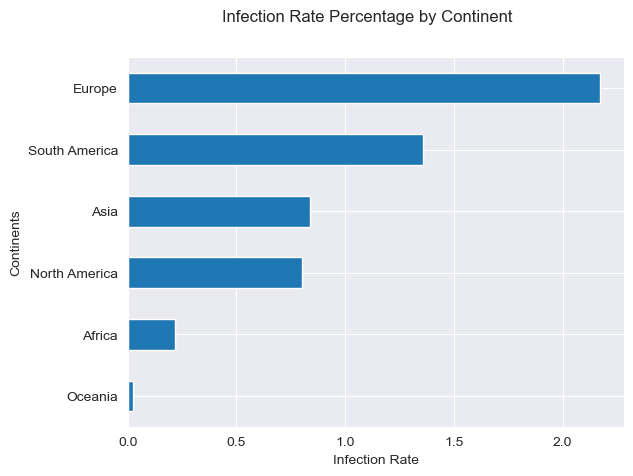

In [58]:
# visualise the infection rate distribution by continent
ranked1.infection_rate.plot(kind='barh',stacked=True)
plt.suptitle('Infection Rate Percentage by Continent') 
plt.xlabel('Infection Rate')
plt.ylabel('Continents'); 

> Infection rates were signficantly higher in Europe compared to other continents.

#### Mortality Rate: Deaths vs population
> show number of death per population by continent

In [23]:
#add new column for deaths per population
df3 = df2.assign(mortality_rate = df['total_deaths'] / df['population']*100)
df3.sample(5)

iso_code      continent     location        date  total_cases  \
74215       SWE         Europe       Sweden  2021-03-30     796445.0   
83931  OWID_WRL            NaN        World  2021-03-24  124840562.0   
64861       LCA  North America  Saint Lucia  2021-04-22       4455.0   
5803        BHS  North America      Bahamas  2020-03-30         14.0   
81985       UZB           Asia   Uzbekistan  2021-03-13      80481.0   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
74215    16427.0            5444.286       13430.0        28.0   
83931   633581.0          514597.714     2744410.0      9721.0   
64861       11.0              14.286          70.0         0.0   
5803         3.0               1.429           NaN         NaN   
81985       89.0              50.857         622.0         0.0   

       new_deaths_smoothed  ...  diabetes_prevalence  female_smokers  \
74215               16.429  ...                 4.79          18.800   
83931             9019.143  ...                 8.51           6.434   
64861                0.857  ...                11.62             NaN   
5803                 0.000  ...                13.17           3.100   
81985                0.000  ...                 7.57           1.300   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
74215        18.900                     NaN                       2.220   
83931        34.635                  60.130                       2.705   
64861           NaN                  87.202                       1.300   
5803         20.400                     NaN                       2.900   
81985        24.700                     NaN                       4.000   

       life_expectancy  human_development_index  case_fatality  \
74215            82.80                    0.945       1.686243   
83931            72.58                    0.737       2.198332   
64861            76.20                    0.759       1.571268   
5803             73.92                    0.814            NaN   
81985            71.72                    0.720       0.772853   

       infection_rate  mortality_rate  
74215        7.886164        0.132980  
83931        1.601588        0.035208  
64861        2.426087        0.038120  
5803         0.003560             NaN  
81985        0.240463        0.001858  

[5 rows x 62 columns]

In [24]:
# group and sort 
mortality_rate= df3.query('continent == continent').groupby(['continent']).mean()[['mortality_rate']]
ranked2=mortality_rate.apply(lambda x: x.sort_values(ascending=True))
ranked2.head(5)  

mortality_rate
continent                    
Oceania              0.000905
Africa               0.004251
Asia                 0.009930
North America        0.022993
South America        0.041484

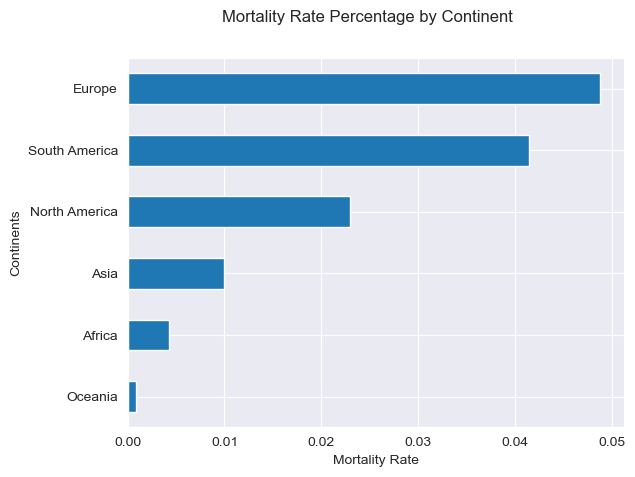

In [59]:
# visualise top five countries in europe with high mortality rates.
ranked2.mortality_rate.plot(kind='barh',stacked=True)
plt.suptitle('Mortality Rate Percentage by Continent') 
plt.xlabel('Mortality Rate')
plt.ylabel('Continents'); 

> The mortality rate shows a similar trend to infection rates, higher in Europe

In [26]:
# get top europian countries with high mortality rates: group and sort 
mortality_europe= df3.query('continent == "Europe"').groupby(['location']).mean()[['mortality_rate']]
ranked_europe=mortality_europe.apply(lambda x: x.sort_values(ascending= False))
ranked_europe.head(5)  

mortality_rate
location                      
San Marino            0.146271
Belgium               0.115685
Andorra               0.090818
United Kingdom        0.088241
Italy                 0.085205

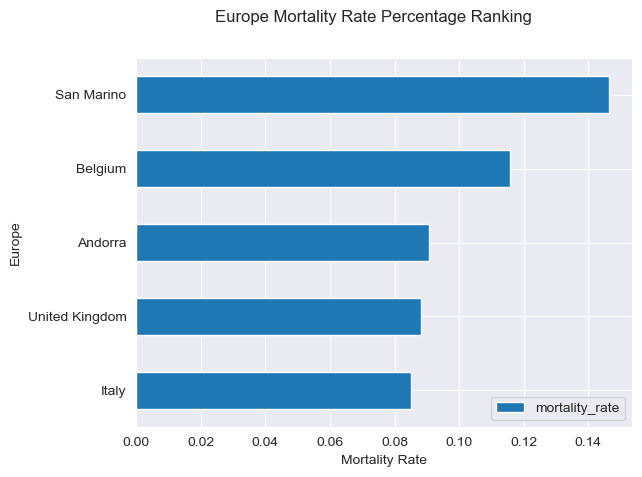

In [60]:
# visualise europian mortality rates distribution by country
ax=ranked_europe[:5].plot(kind='barh',stacked= False)
ax.invert_yaxis()
plt.suptitle('Europe Mortality Rate Percentage Ranking ') 
plt.xlabel('Mortality Rate')
plt.ylabel('Europe'); 

In [28]:
# get top europian countries with high case fatality rates 
case_fatality_europe= df3.query('continent == "Europe"').groupby(['location']).mean()[['case_fatality']]
ranked_europe2=case_fatality_europe.apply(lambda x: x.sort_values(ascending= False))
ranked_europe2.head(5)  

case_fatality
location                     
Italy                8.408940
Belgium              7.824277
United Kingdom       7.758796
France               7.047091
Hungary              6.546357

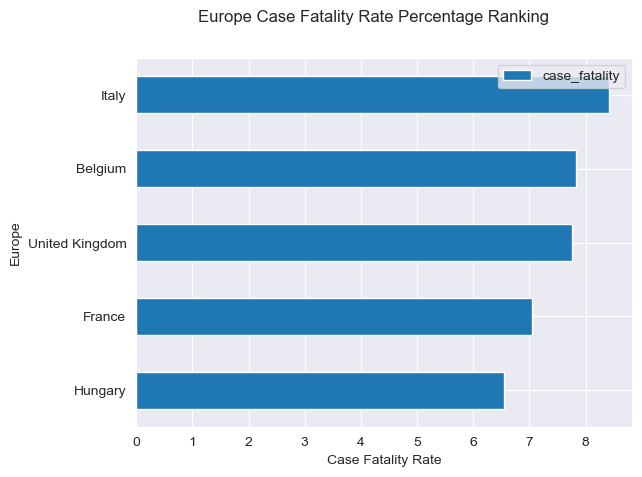

In [61]:
# visualise europian mortality rates distribution by country
ax=ranked_europe2[:5].plot(kind='barh',stacked= False)
ax.invert_yaxis()
plt.suptitle('Europe Case Fatality Rate Percentage Ranking ') 
plt.xlabel('Case Fatality Rate')
plt.ylabel('Europe'); 

In [30]:
# get top african countries with high mortality rates 
mortality_africa= df3.query('continent == "Africa"').groupby(['location']).mean()[['mortality_rate']]
ranked_africa=mortality_africa.apply(lambda x: x.sort_values(ascending= False))
ranked_africa.head(5)  

mortality_rate
location                    
South Africa        0.036453
Tunisia             0.024100
Eswatini            0.019833
Libya               0.014101
Cape Verde          0.013671

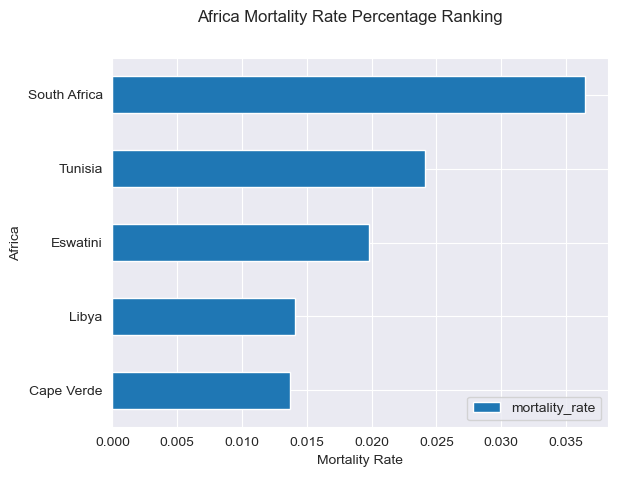

In [62]:
# visualise europian mortality rates distribution by country
ax1=ranked_africa[:5].plot(kind='barh',stacked= False)
ax1.invert_yaxis()
plt.suptitle('Africa Mortality Rate Percentage Ranking ') 
plt.xlabel('Mortality Rate')
plt.ylabel('Africa'); 

In [32]:
# get top african countries with high case fatality rates 
fatality_africa= df3.query('continent == "Africa"').groupby(['location']).mean()[['case_fatality']]
ranked_africa2=fatality_africa.apply(lambda x: x.sort_values(ascending= False))
ranked_africa.head(5)  

mortality_rate
location                    
South Africa        0.036453
Tunisia             0.024100
Eswatini            0.019833
Libya               0.014101
Cape Verde          0.013671

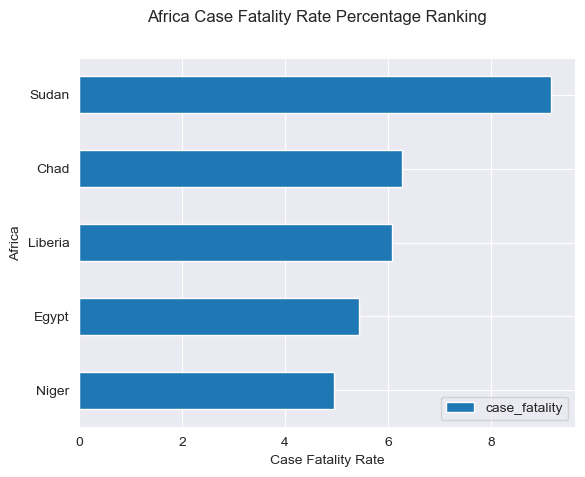

In [63]:
# visualise african case fatality rates distribution by country
ax1=ranked_africa2[:5].plot(kind='barh',stacked= False)
ax1.invert_yaxis()
plt.suptitle('Africa Case Fatality Rate Percentage Ranking ') 
plt.xlabel('Case Fatality Rate')
plt.ylabel('Africa'); 

In [34]:
# get top asian countries with high mortality rates 
mortality_asia= df3.query('continent == "Asia"').groupby(['location']).mean()[['mortality_rate']]
ranked_asia=mortality_asia.apply(lambda x: x.sort_values(ascending= False))
ranked_asia.head(5)  

mortality_rate
location                
Armenia         0.054375
Iran            0.036856
Georgia         0.032201
Israel          0.028081
Lebanon         0.022563

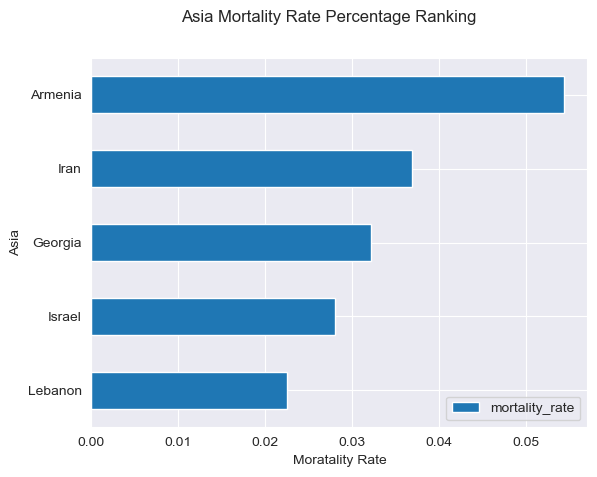

In [64]:
# visualise asia mortality rates distribution by country
ax3=ranked_asia[:5].plot(kind='barh',stacked= False)
ax3.invert_yaxis()
plt.suptitle('Asia Mortality Rate Percentage Ranking ') 
plt.xlabel('Moratality Rate')
plt.ylabel('Asia'); 

In [36]:
# get top asian countries with high case fatality rates 
fatality_asia= df3.query('continent == "Asia"').groupby(['location']).mean()[['case_fatality']]
ranked_asia2=fatality_asia.apply(lambda x: x.sort_values(ascending= False))
ranked_asia2.head(5)  

case_fatality
location                  
Yemen            26.392699
Syria             5.737436
Iran              5.473134
Philippines       5.430392
China             4.817835

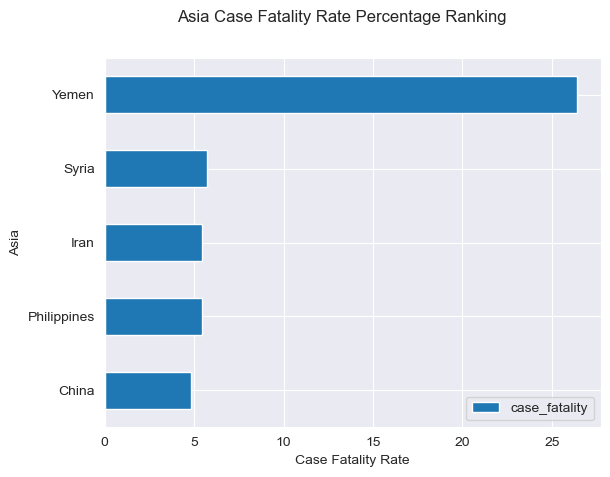

In [65]:
# visualise asia case fatality rates distribution by country
ax4=ranked_asia2[:5].plot(kind='barh',stacked= False)
ax4.invert_yaxis()
plt.suptitle('Asia Case Fatality Rate Percentage Ranking ') 
plt.xlabel('Case Fatality Rate')
plt.ylabel('Asia'); 

In [38]:
#change date dtype to datetime
df3.date = pd.to_datetime(df3.date)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85171 entries, 0 to 85170
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               85171 non-null  object        
 1   continent                              81060 non-null  object        
 2   location                               85171 non-null  object        
 3   date                                   85171 non-null  datetime64[ns]
 4   total_cases                            83072 non-null  float64       
 5   new_cases                              83070 non-null  float64       
 6   new_cases_smoothed                     82069 non-null  float64       
 7   total_deaths                           73408 non-null  float64       
 8   new_deaths                             73566 non-null  float64       
 9   new_deaths_smoothed                    82069 non-null  float6

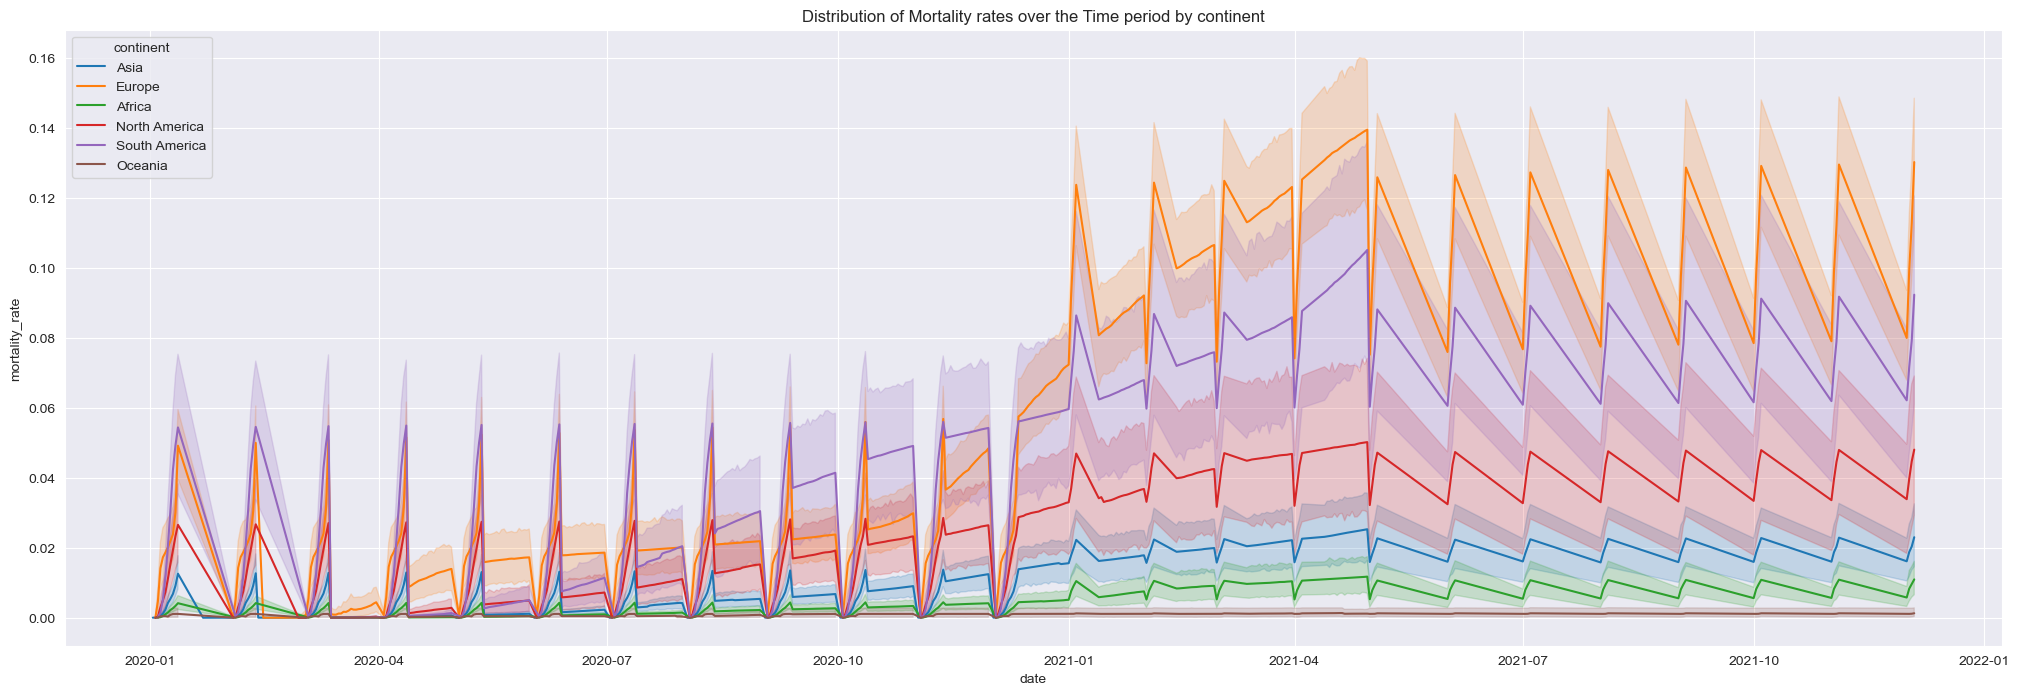

In [39]:
#plot mortality rate changes by continent over the time period
plt.figure(figsize=(25,8))
sb.set_style("darkgrid")
sb.lineplot('date', 'mortality_rate', data=df3, hue='continent')
plt.title('Distribution of Mortality rates over the Time period by continent');

> All continents showed a similar trend in mortality distributions, a gradual increase from January 2020 to a peak level in April 2021.

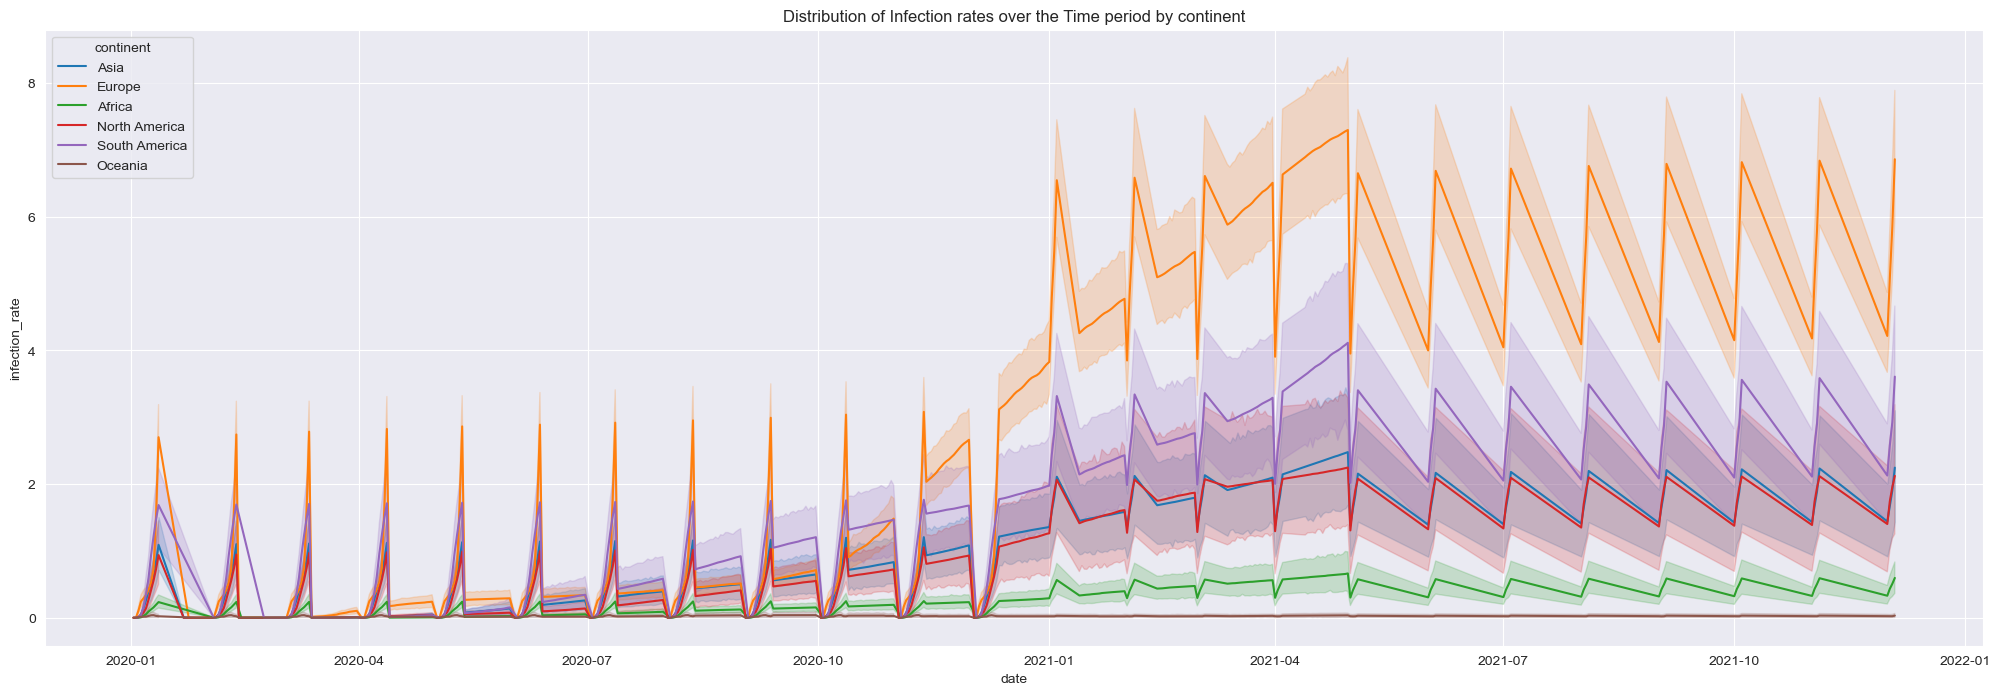

In [40]:
#plot infection rate changes by continent over the time period
plt.figure(figsize=(25,8))
sb.set_style("darkgrid")
sb.lineplot('date', 'infection_rate', data=df3, hue='continent')
plt.title('Distribution of Infection rates over the Time period by continent');

> The infection rate distribution over the time period  followed the same pattern as depicted with mortality rates.

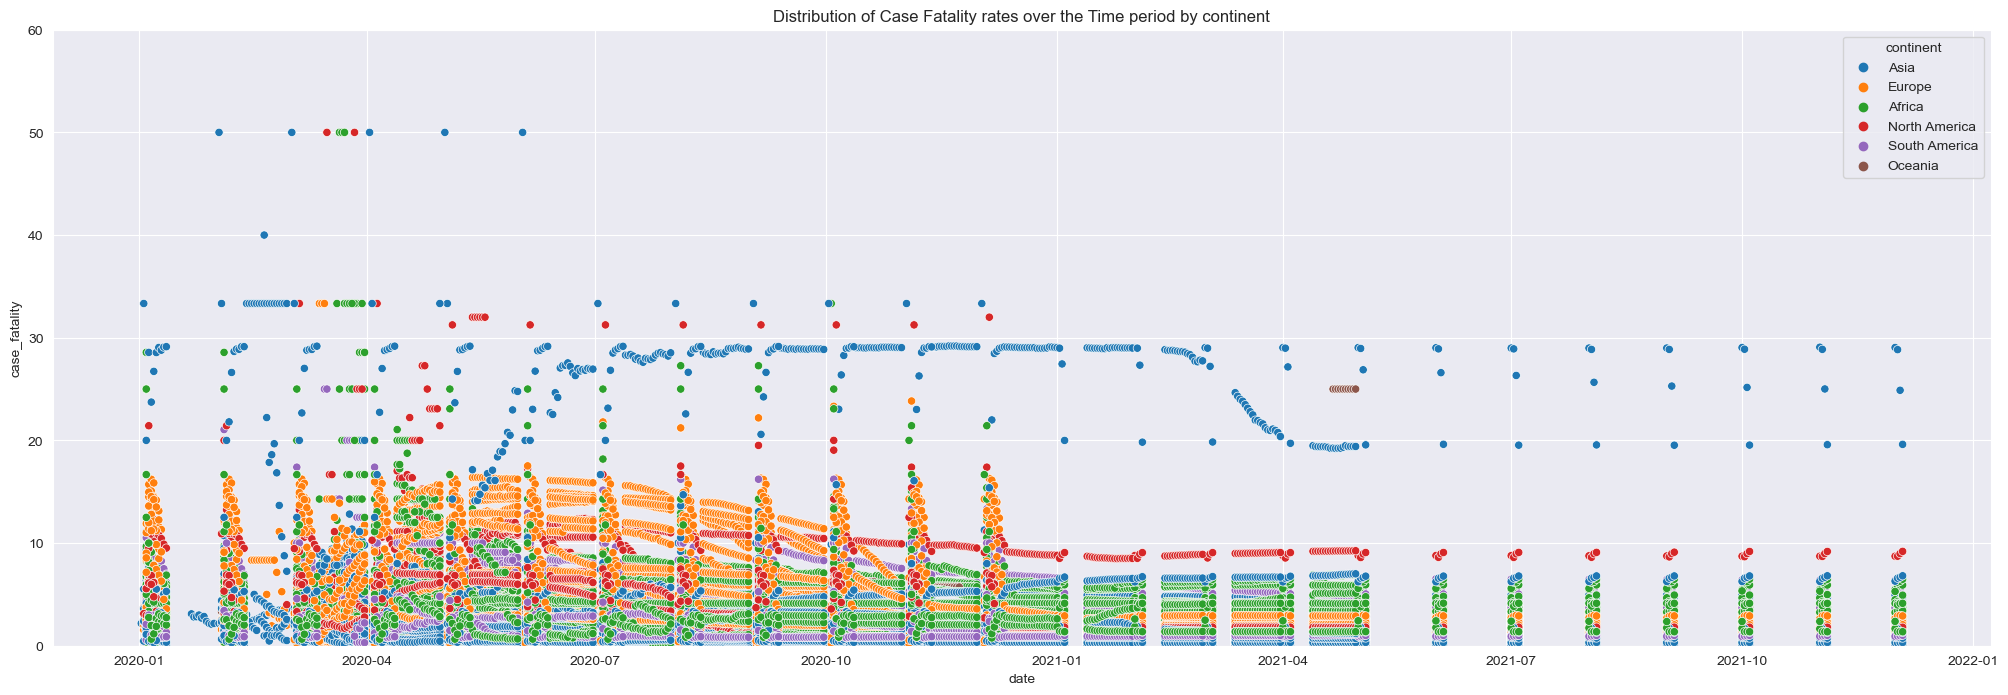

In [41]:
#plot case fatality rate changes by continent over the time period
plt.figure(figsize=(25,8))
sb.set_style("darkgrid")
sb.scatterplot('date', 'case_fatality', data=df3, hue='continent')
plt.ylim(0, 60)
plt.title('Distribution of Case Fatality rates over the Time period by continent');

##### Create a Correlation Matrix for Numerical Variables

In [42]:
num_variables=['life_expectancy','infection_rate','mortality_rate','case_fatality','human_development_index',
              'hospital_beds_per_thousand','total_cases_per_million','total_deaths_per_million']

chronic_variables =['male_smokers','female_smokers','diabetes_prevalence','cardiovasc_death_rate','infection_rate',
                    'mortality_rate','case_fatality','total_cases_per_million','total_deaths_per_million']

social_variables=['gdp_per_capita','extreme_poverty','human_development_index','mortality_rate','case_fatality'
                  ,'total_cases_per_million','total_deaths_per_million','reproduction_rate','stringency_index']

age_variables=['aged_65_older','aged_70_older','median_age','mortality_rate',
               'case_fatality','total_cases_per_million','total_deaths_per_million']

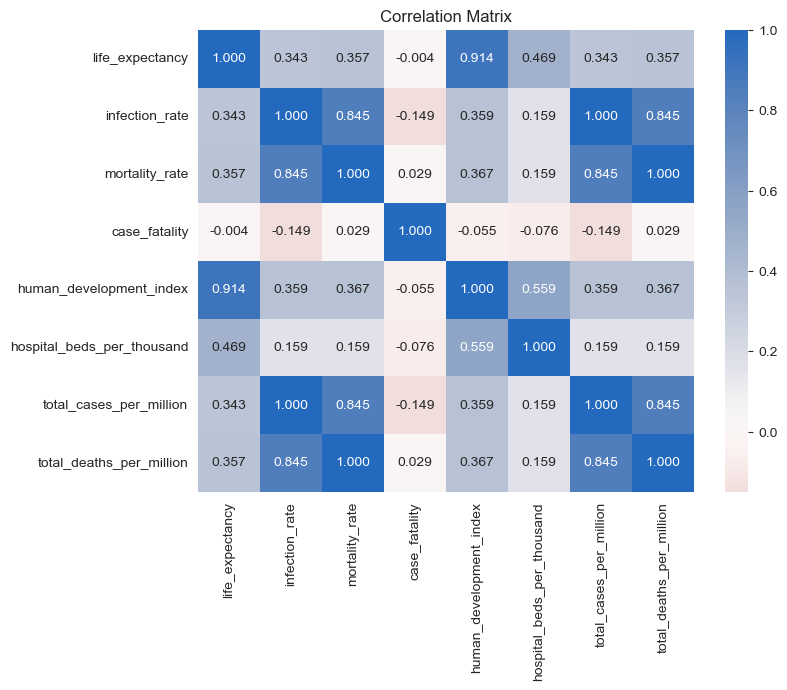

In [43]:
# Create a correlation matrix for numeric variables
plt.figure(figsize = [8, 6])
sb.heatmap(df3[num_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix'); 

> Infection rate and mortality rate showed a positive correlation across all continents, also as expected total cases and total deaths per million.


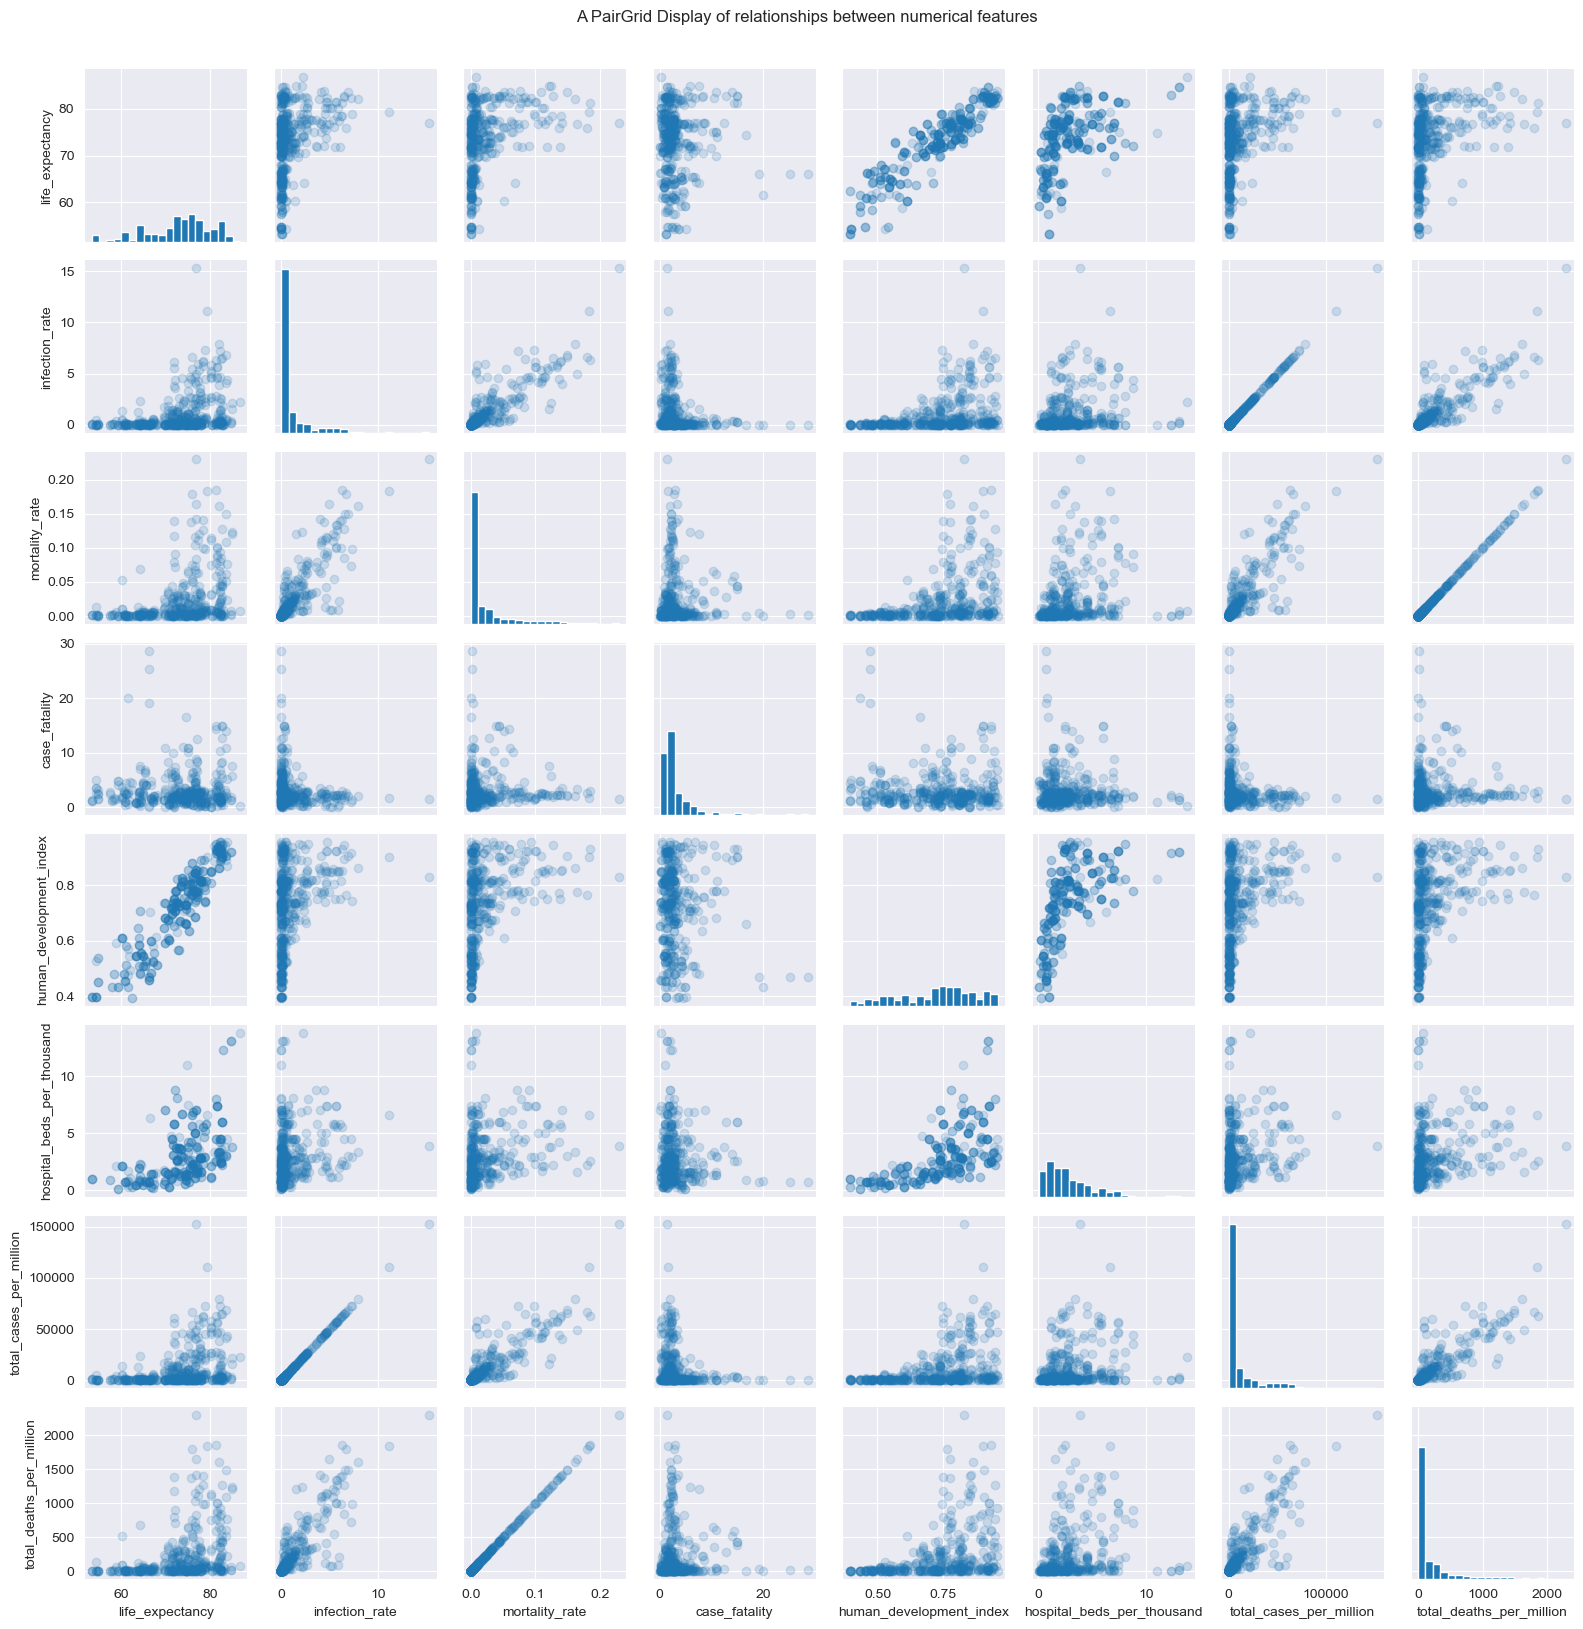

In [44]:
# for a clearer assessment, extract a random sample of 500
# to complement hitmap, plot PairGrid to visualise relationships
random_sample = np.random.choice(df3.shape[0], 500, replace = False)
chunk = df3.loc[random_sample,:]
x = sb.PairGrid(data = chunk, vars = num_variables,height=2)
x = x.map_diag(plt.hist, bins = 20)
x.map_offdiag(plt.scatter,alpha=1/6)
x.fig.suptitle('A PairGrid Display of relationships between numerical features',y=1.02);

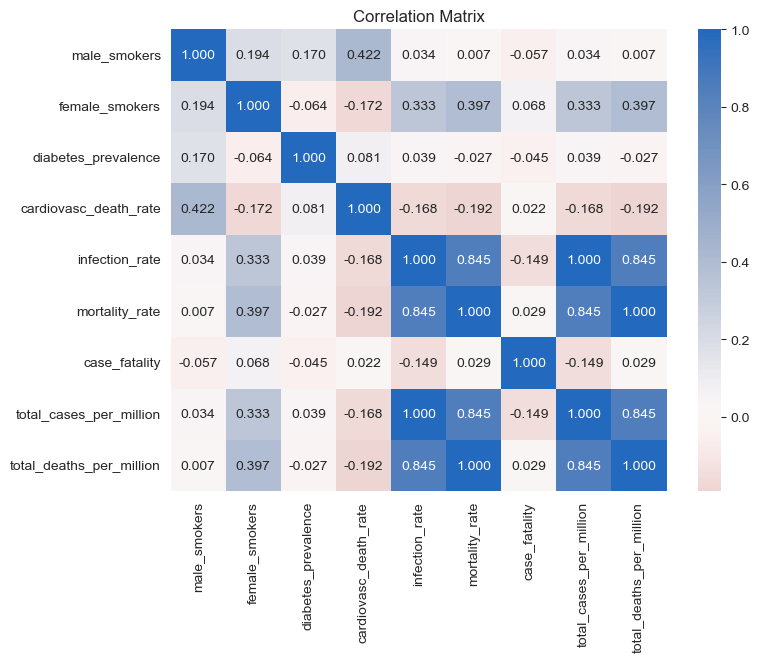

In [45]:
# Create a correlation matrix for chronic variables
plt.figure(figsize = [8, 6])
sb.heatmap(df3[chronic_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix'); 

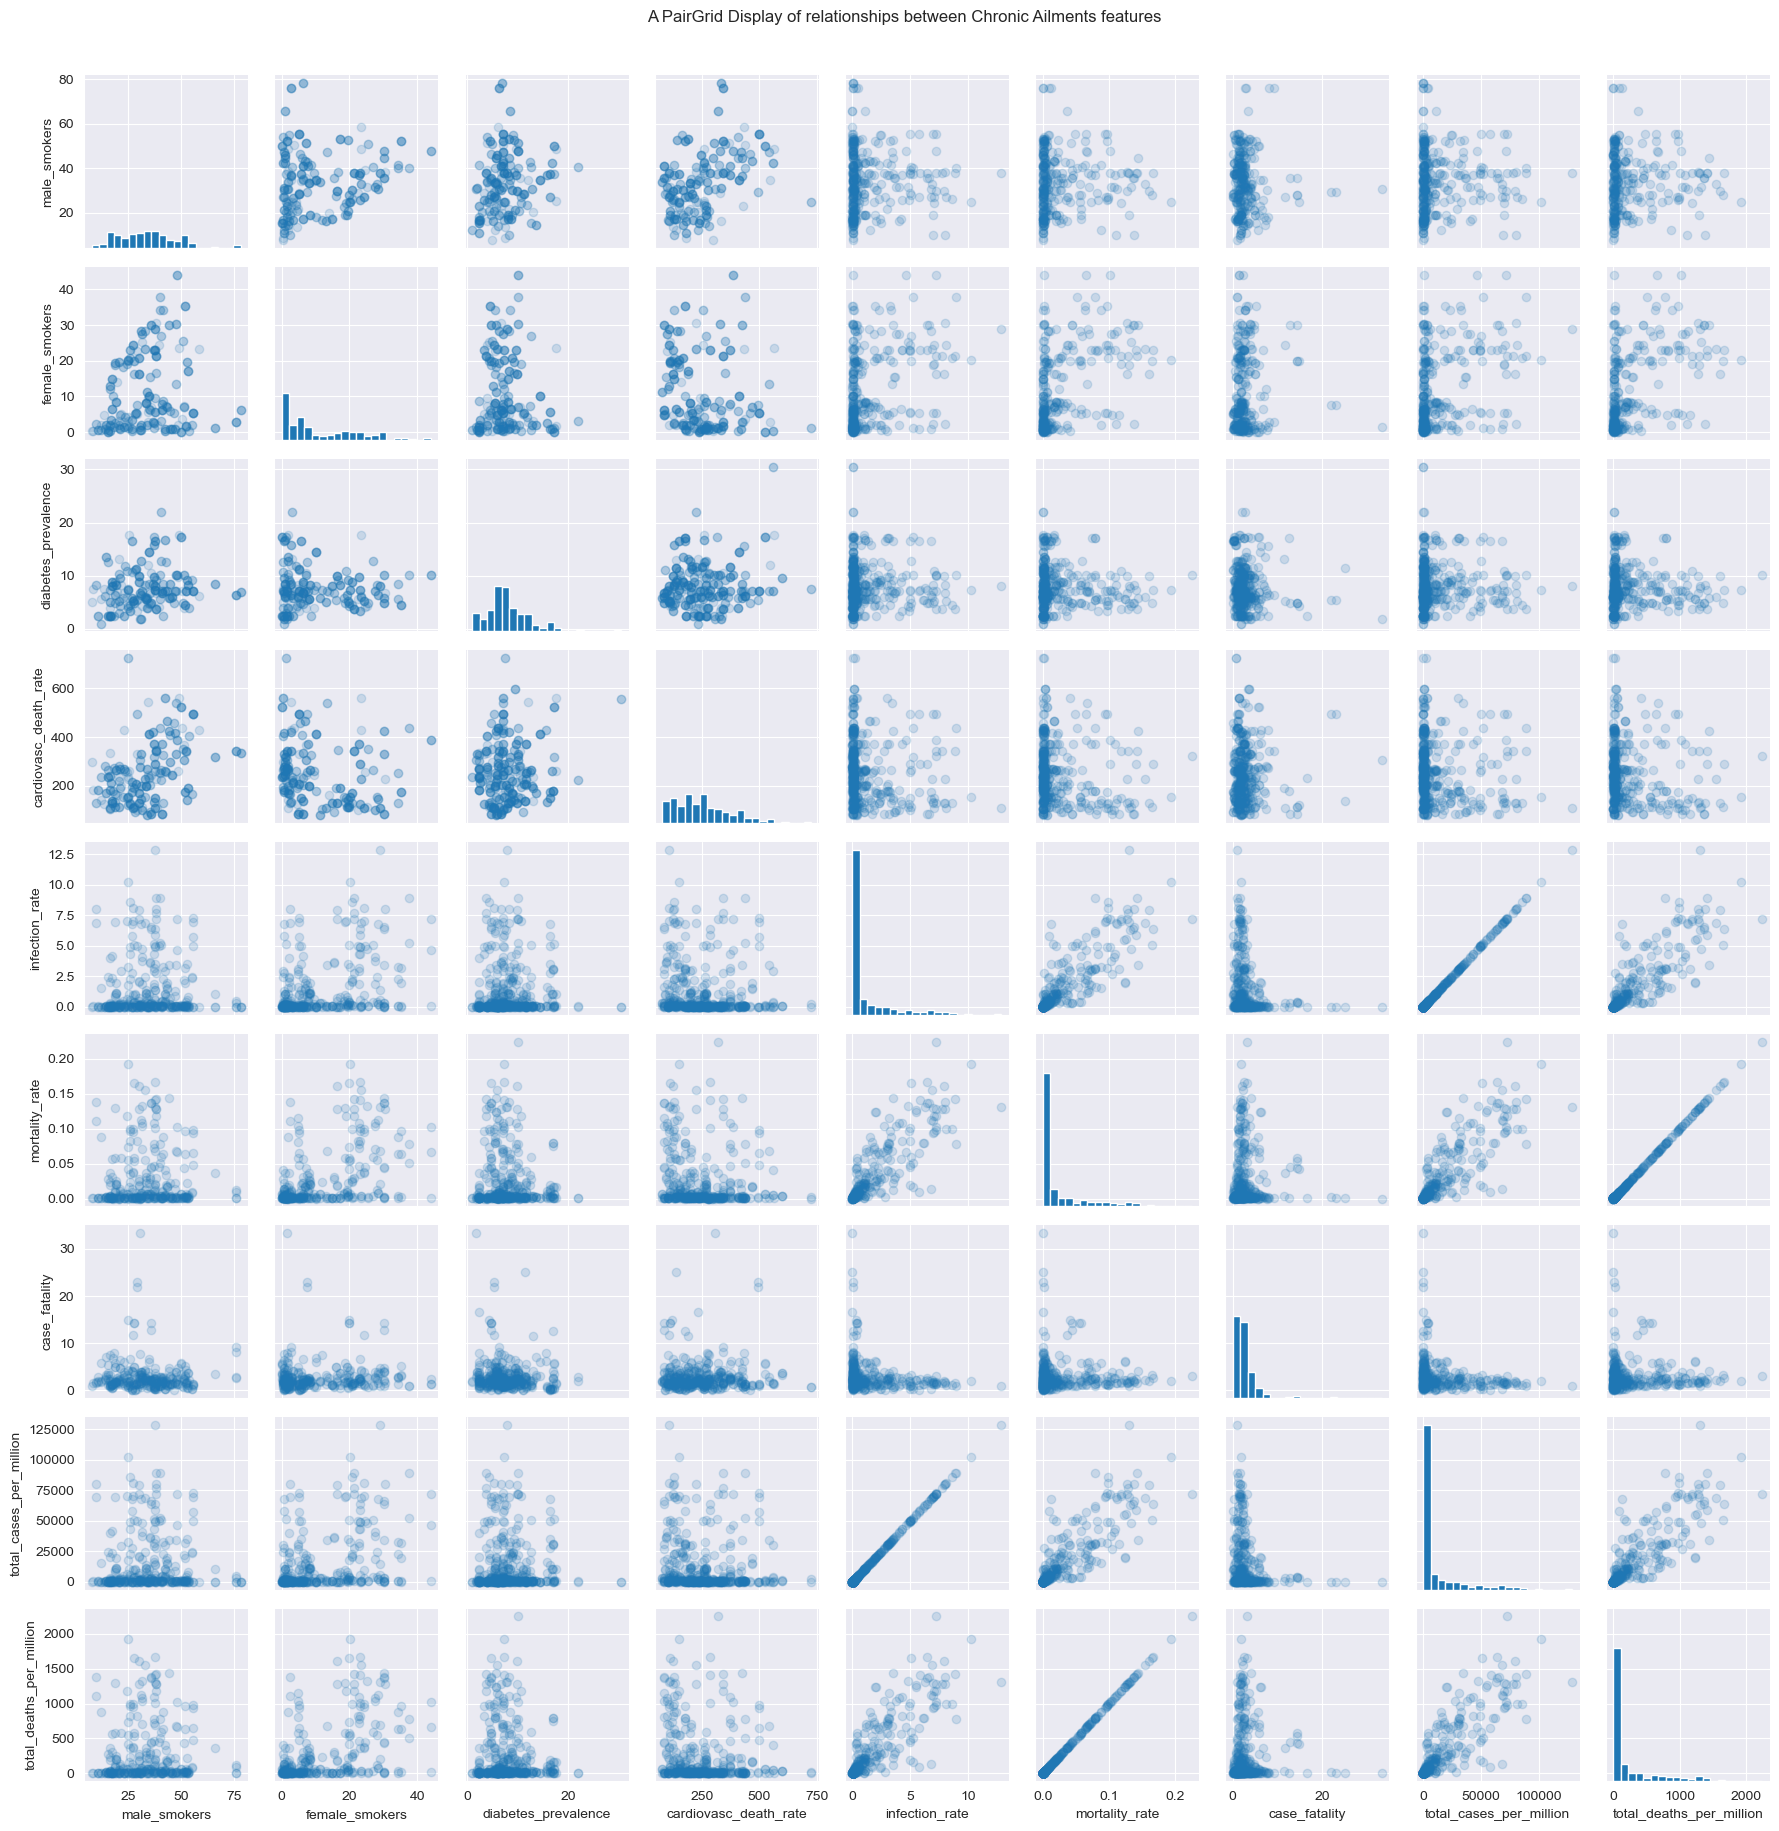

In [46]:
#  lets plot PairGrid to visualise relationships for chronic features
rad_sample = np.random.choice(df3.shape[0], 500, replace = False)
chunk1 = df3.loc[rad_sample,:]
x = sb.PairGrid(data = chunk1, vars = chronic_variables,height=2)
x = x.map_diag(plt.hist, bins = 20)
x.map_offdiag(plt.scatter,alpha=1/6)
x.fig.suptitle('A PairGrid Display of relationships between Chronic Ailments features',y=1.02);

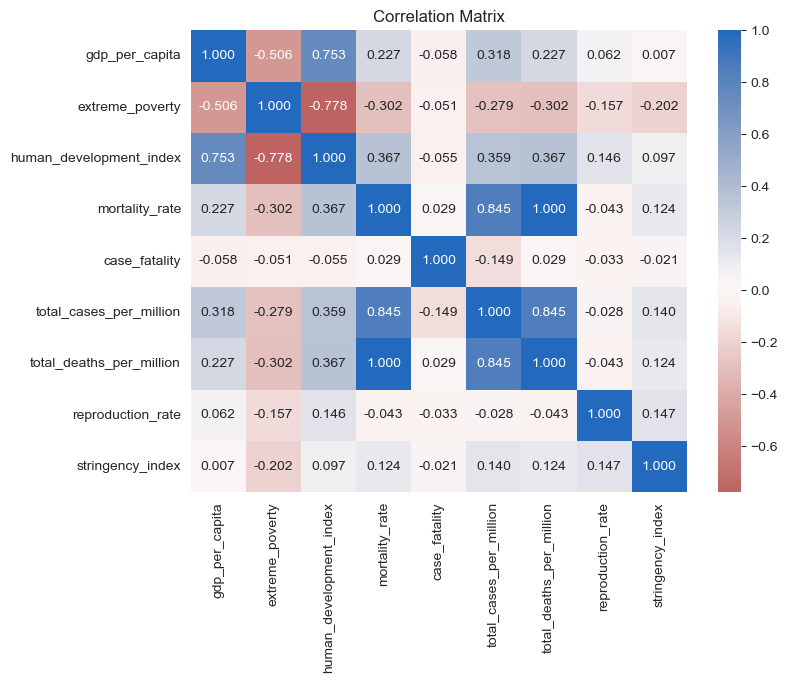

In [47]:
# Create a correlation matrix for social variables
plt.figure(figsize = [8, 6])
sb.heatmap(df3[social_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix'); 

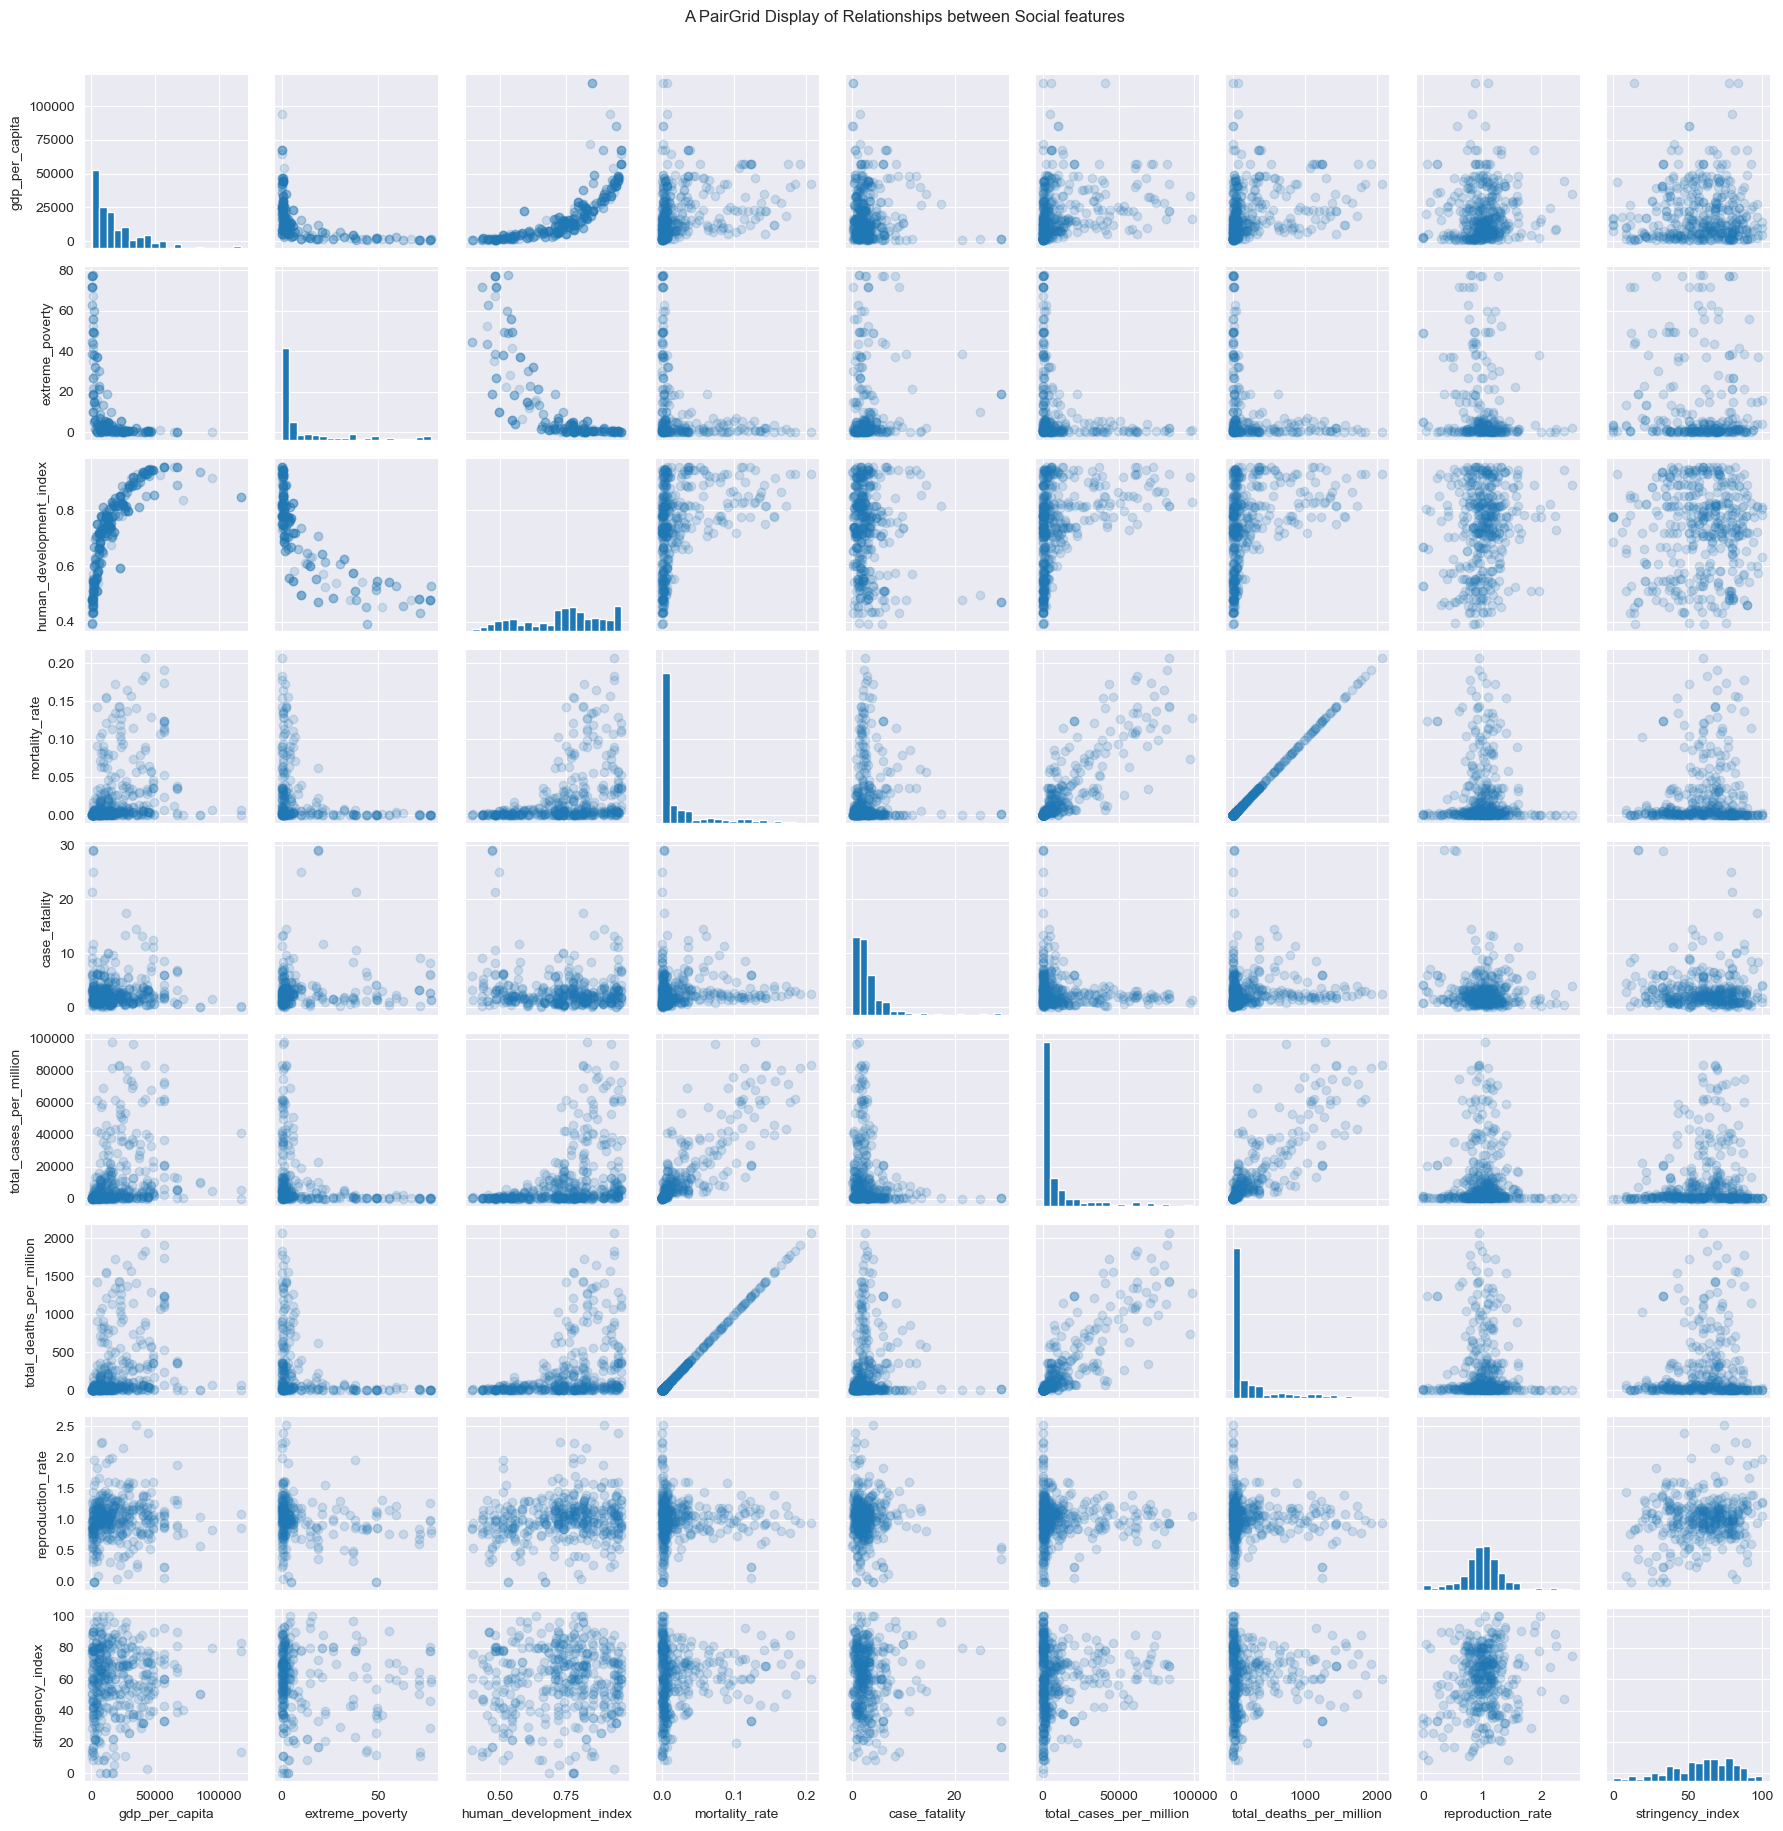

In [48]:
#  lets plot PairGrid to visualise relationships for social features category
rand_sample = np.random.choice(df3.shape[0], 500, replace = False)
chunk2 = df3.loc[rand_sample,:]
x = sb.PairGrid(data = chunk2, vars = social_variables,height=2)
x = x.map_diag(plt.hist, bins = 20)
x.map_offdiag(plt.scatter,alpha=1/6)
x.fig.suptitle('A PairGrid Display of Relationships between Social features',y=1.02);

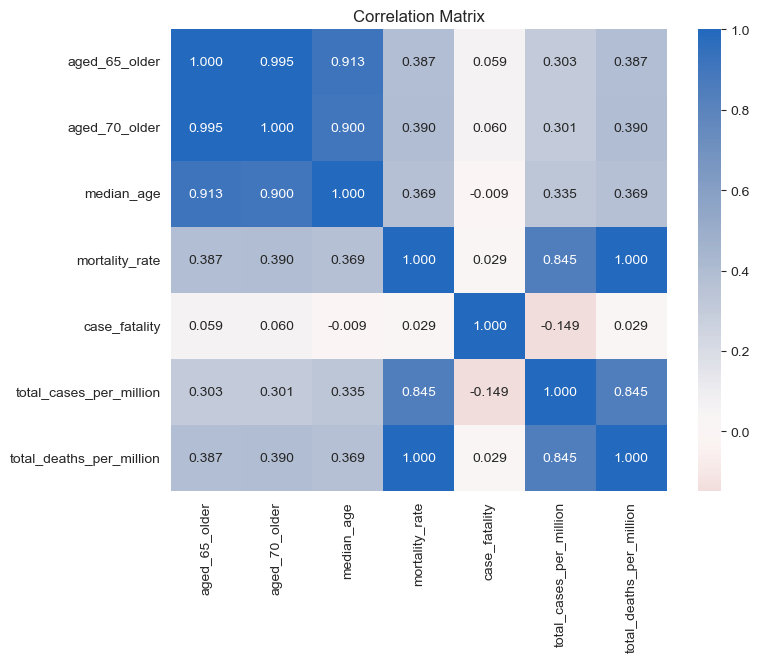

In [49]:
# Create a correlation matrix for age variables
plt.figure(figsize = [8, 6])
sb.heatmap(df3[age_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix'); 

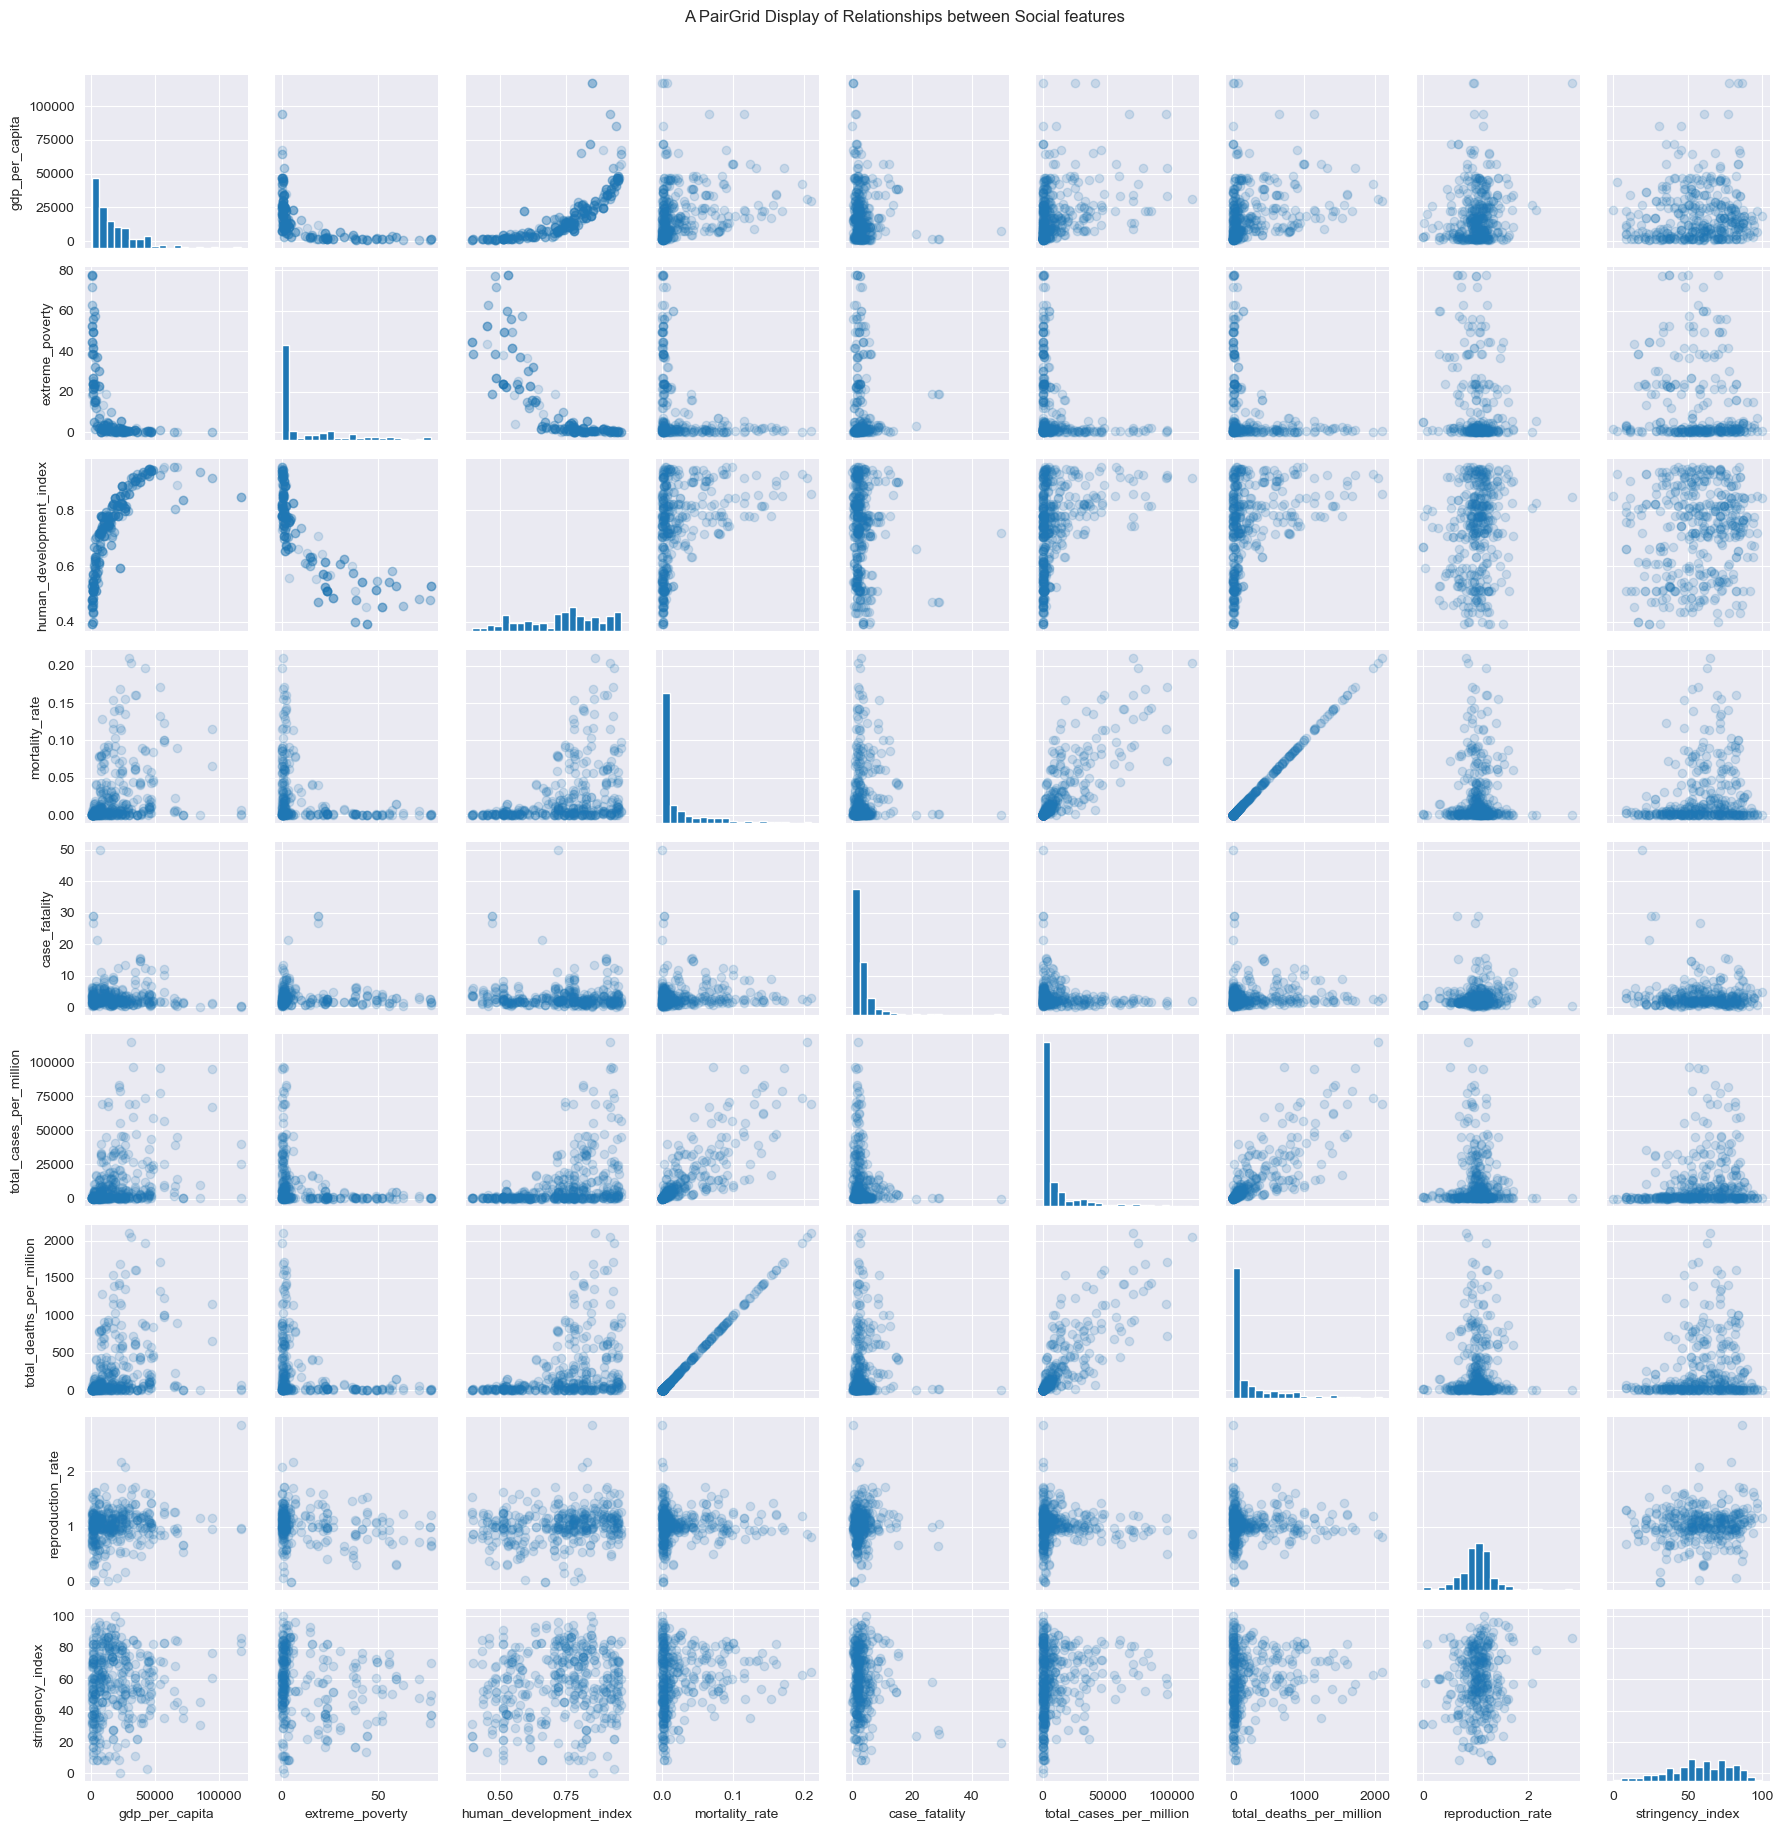

In [50]:
#  lets plot PairGrid to visualise relationships for social features category
sample = np.random.choice(df3.shape[0], 500, replace = False)
chunk3 = df3.loc[sample,:]
x = sb.PairGrid(data = chunk3, vars = social_variables,height=2)
x = x.map_diag(plt.hist, bins = 20)
x.map_offdiag(plt.scatter,alpha=1/6)
x.fig.suptitle('A PairGrid Display of Relationships between Social features',y=1.02);

> There was no significant relationship between any of the social derminants features against all measures of Covid-19 impact; moratlity , infectivity  and case fatality rates.

In [51]:
df3.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan 2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   case_fatality  infection_rate  mortality_rate  
0            NaN        0.000003             NaN  
1            NaN        0.000003             NaN  
2            NaN        0.000003             NaN  
3            NaN        0.000003             NaN  
4            NaN        0.000003             NaN  

[5 rows x 62 columns]

> Store clean data and create Power Bi Dashboard

In [52]:
df3.to_csv('covid_impact.csv',index=False)